<a href="https://colab.research.google.com/github/zzeeddd95/capstone-project/blob/master/Decisiontreeregressormsft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import pandas_datareader as web
import matplotlib.pyplot as plt
plt.style.use('bmh')


/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [ ]:
from google.colab import files
apple = files.upload()

Saving MSFT.csv to MSFT.csv


In [ ]:
msft = pd.read_csv('MSFT.csv')
msft.head(6)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-05-26,26.230000,26.610001,24.559999,25.010000,19.757509,176684100
1,2010-05-27,25.730000,26.360001,25.730000,26.000000,20.539593,136433600
2,2010-05-28,25.840000,26.120001,25.660000,25.799999,20.381601,67496900
3,2010-06-01,25.530001,26.309999,25.520000,25.889999,20.452698,76152400
4,2010-06-02,26.059999,26.480000,25.730000,26.459999,20.902985,65718800
5,2010-06-03,26.549999,26.930000,26.410000,26.860001,21.218981,67837000


In [ ]:
msft.shape

(2516, 7)

In [ ]:
#Filter out data to only obtain close price (independant variable)
msft = msft[['Close']]
msft

,Close
0,25.010000
1,26.000000
2,25.799999
3,25.889999
4,26.459999
...,...
2511,184.910004
2512,183.630005
2513,185.660004
2514,183.429993


In [ ]:
#Create a variable to allow for predicting 'n days' into the future
future_out =100

In [ ]:
#Create the dependant variable which will be shifted 'n' units up
msft['Prediction'] = msft[['Close']].shift(-future_out)
msft.tail()

,Close,Prediction
2511,184.910004,NaN
2512,183.630005,NaN
2513,185.660004,NaN
2514,183.429993,NaN
2515,183.509995,NaN


In [ ]:
#create independant data set by converting the dataframe to a numpy array
msftdfx = np.array(msft.drop(['Prediction'],1))
#Renove the last 'n' rows
msftdfx = msftdfx[:-future_out] #therefore for every column, all of the rows will be displayed - future out
msftdfx

array([[ 25.01    ],
       [ 26.      ],
       [ 25.799999],
       ...,
       [158.669998],
       [158.960007],
       [157.589996]])

In [ ]:
#creat dependant dataset (prediction), all values including any Nan's
msftdfy = np.array(msft['Prediction'])
#Filter this data by obtaining all values except the last 'n' rows
msftdfy = msftdfy[:-future_out]
print(msftdfy)

[ 25.82      25.1       25.309999 ... 185.660004 183.429993 183.509995]


In [ ]:
#split data into 80% training and 20%testing
msftdfx_train , msftdfx_test, msftdfy_train, msftdfy_test = train_test_split(msftdfx, msftdfy, test_size = 0.2)

In [ ]:
#Create and train the decision tree regressor model
tree = DecisionTreeRegressor().fit(msftdfx_train,msftdfy_train)

In [ ]:
#test model accuracy via score which returns the coefficient of determination (R^2) of prediction
treeconfidence = tree.score(msftdfx_test, msftdfy_test)
print("Decision tree regressor confidence", treeconfidence)

Decision tree regressor confidence 0.9761193052251909


In [ ]:
#set msft_forecast = to the last 200 rows of original dataset from close price column
msft_forecast = np.array(msft.drop(['Prediction'],1))[-future_out:]
print(msft_forecast)


[[157.699997]
 [160.619995]
 [158.619995]
 [159.029999]
 [157.580002]
 [160.089996]
 [162.089996]
 [161.339996]
 [163.279999]
 [162.130005]
 [163.179993]
 [166.169998]
 [167.100006]
 [166.5     ]
 [165.699997]
 [166.720001]
 [165.039993]
 [162.279999]
 [165.460007]
 [168.039993]
 [172.779999]
 [170.229996]
 [174.380005]
 [180.119995]
 [179.899994]
 [183.630005]
 [183.889999]
 [188.699997]
 [184.440002]
 [184.710007]
 [183.710007]
 [185.350006]
 [187.229996]
 [187.279999]
 [184.419998]
 [178.589996]
 [170.889999]
 [168.070007]
 [170.169998]
 [158.179993]
 [162.009995]
 [172.789993]
 [164.509995]
 [170.550003]
 [166.270004]
 [161.570007]
 [150.619995]
 [160.919998]
 [153.630005]
 [139.059998]
 [158.830002]
 [135.419998]
 [146.570007]
 [140.399994]
 [142.710007]
 [137.350006]
 [135.979996]
 [148.339996]
 [146.919998]
 [156.110001]
 [149.699997]
 [160.229996]
 [157.710007]
 [152.110001]
 [155.259995]
 [153.830002]
 [165.270004]
 [163.490005]
 [165.130005]
 [165.139999]
 [165.509995]
 [173.

In [ ]:
#Print decision tree predicted values for upcoming 'n' days
treeprediction = tree.predict(msft_forecast)
print(treeprediction)

[184.910004 183.429993 185.660004 183.429993 184.910004 183.429993
 183.429993 183.429993 183.429993 183.429993 183.429993 183.429993
 183.429993 183.429993 183.429993 183.429993 183.429993 183.429993
 183.429993 183.429993 183.429993 183.429993 183.429993 183.429993
 183.429993 183.429993 183.429993 183.429993 183.429993 183.429993
 183.429993 183.429993 183.429993 183.429993 183.429993 183.429993
 183.429993 183.429993 183.429993 185.660004 183.429993 183.429993
 183.429993 183.429993 183.429993 183.429993 171.880005 183.429993
 179.75     170.889999 183.429993 167.100006 165.270004 155.710007
 148.339996 183.630005 174.380005 165.130005 165.130005 180.529999
 177.039993 183.429993 184.910004 171.419998 186.740005 179.75
 183.429993 183.429993 183.429993 183.429993 183.429993 183.429993
 183.429993 183.429993 183.429993 183.429993 183.429993 183.429993
 183.429993 183.429993 183.429993 183.429993 183.429993 183.429993
 183.429993 183.429993 183.429993 183.429993 183.429993 183.429993

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


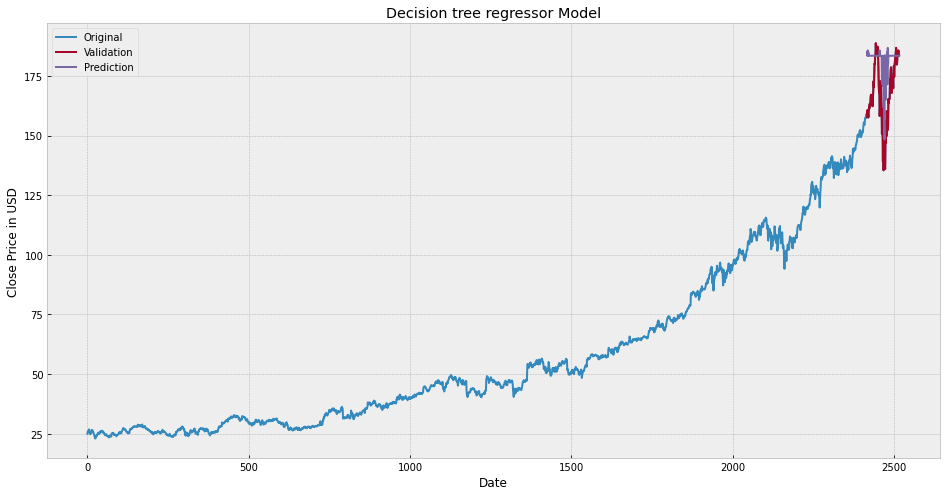

In [ ]:
prediction = treeprediction
valid = msft[msftdfx.shape[0]:]
valid['Prediction'] = prediction
plt.figure(figsize = (16,8))
plt.title ('Decision tree regressor Model')
plt.xlabel('Date')
plt.ylabel('Close Price in USD')
plt.plot(msft['Close'])
plt.plot(valid[['Close','Prediction']])
plt.legend(['Original','Validation','Prediction'])
plt.show()